Matplotlib is building the font cache; this may take a moment.


Shape: (10, 5)

Columns:
 Index(['commit_id', 'commit_message', 'author', 'date', 'label'], dtype='object')

Sample Data:
    commit_id                               commit_message   author  \
0          1                  Fixed bug in payment module  Srinija   
1          2        Added support for user authentication  Srinija   
2          3    Refactored logging system for performance  Srinija   
3          4   Updated README and contributing guidelines  Srinija   
4          5  Improved error handling in checkout service  Srinija   

         date        label  
0  2024-12-01       bugfix  
1  2024-12-02      feature  
2  2024-12-03     refactor  
3  2024-12-04         docs  
4  2024-12-05  enhancement  


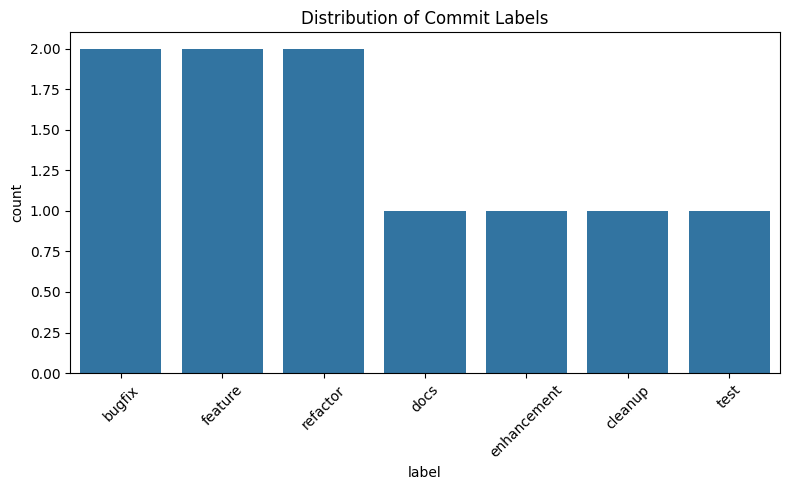

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/sample_commits.csv')

# Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nSample Data:\n", df.head())

# Distribution of labels
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Distribution of Commit Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import re
import string

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text


df['clean_message'] = df['commit_message'].astype(str).apply(clean_text)
df[['message', 'clean_message']].head()


KeyError: "['message'] not in index"

In [6]:
df[['commit_message', 'clean_message']].head()

,commit_message,clean_message
0,Fixed bug in payment module,fixed bug in payment module
1,Added support for user authentication,added support for user authentication
2,Refactored logging system for performance,refactored logging system for performance
3,Updated README and contributing guidelines,updated readme and contributing guidelines
4,Improved error handling in checkout service,improved error handling in checkout service


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Vectorization
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     feature       0.00      0.00      0.00       2.0
    refactor       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 2]
 [0 0]]


/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Classification Report:
               precision    recall  f1-score   support

     feature       0.00      0.00      0.00       2.0
    refactor       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 2]
 [0 0]]


/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train-test split
X = df['clean_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 3: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test_vec)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     feature       0.00      0.00      0.00       2.0
    refactor       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 2]
 [0 0]]


/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/srinijamorla/srinijamorla/devinsight-ai/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

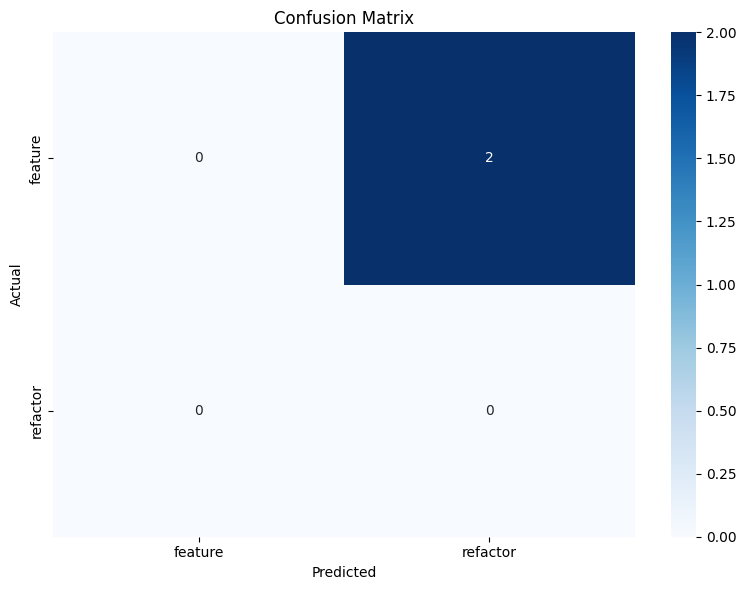

In [15]:
import numpy as np

# Get unique labels from both y_test and y_pred
labels = np.unique(np.concatenate((y_test, y_pred)))

# Generate confusion matrix using only present labels
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## 1.2 Labeling the Commit Messages

In this section, we automatically label unlabeled commit messages using rule-based keyword matching.


In [19]:
import pandas as pd

# Load the original commits CSV
df = pd.read_csv('../data/commits.csv')

# Define labeling rules
def label_commit(msg):
    msg = msg.lower()
    if 'fix' in msg or 'bug' in msg or 'error' in msg or 'issue' in msg:
        return 'bugfix'
    elif 'refactor' in msg or 'optimize' in msg:
        return 'refactor'
    elif 'add' in msg or 'implement' in msg or 'create' in msg or 'support' in msg:
        return 'feature'
    elif 'doc' in msg or 'readme' in msg or 'comment' in msg or 'typo' in msg:
        return 'docs'
    else:
        return 'other'

# Fill missing labels
df['label'] = df['label'].fillna('').replace('', None)
df['label'] = df.apply(lambda row: label_commit(row['message']) if pd.isna(row['label']) else row['label'], axis=1)

# Save the updated labeled data
df.to_csv('../data/labeled_commits.csv', index=False)
print("✅ Labeled commits saved to ../data/labeled_commits.csv")


✅ Labeled commits saved to ../data/labeled_commits.csv


Labeled data saved to ../data/labeled_commits.csv


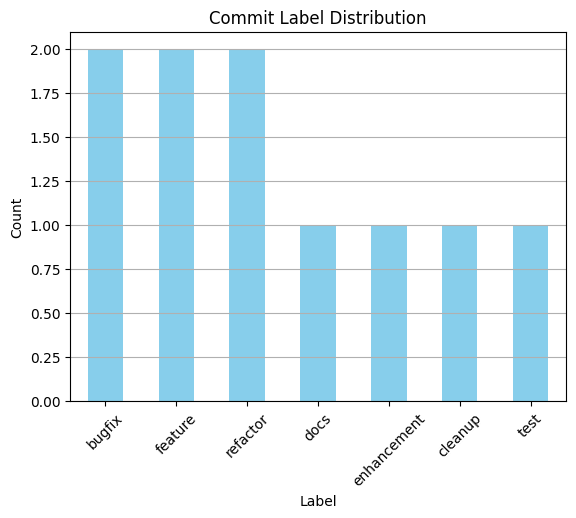

In [25]:
import sys, os


import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.preprocess import apply_commit_labels

# Load the commits CSV
df = pd.read_csv('../data/commits.csv')

# Apply labeling
df = apply_commit_labels(df)

# Save to a new file
df.to_csv('../data/labeled_commits.csv', index=False)
print("Labeled data saved to ../data/labeled_commits.csv")

# Visualize label distribution
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Commit Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [31]:

import pandas as pd

# Load labeled data
df = pd.read_csv('../data/labeled_commits.csv')
print("Columns", df.columns.tolist())

print(df.columns)


Columns ['commit_id', 'commit_message', 'author', 'date', 'label']
Index(['commit_id', 'commit_message', 'author', 'date', 'label'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Load data
df = pd.read_csv('../data/labeled_commits.csv')
df = df.dropna(subset=['commit_message', 'label'])

# Features and labels
X = df['commit_message']
y = df['label']

# Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_vec = vectorizer.fit_transform(X)

# Model training
model = LogisticRegression()
model.fit(X_vec, y)

# Save model and vectorizer
with open('../src/model.pkl', 'wb') as f:
    pickle.dump({'model': model, 'vectorizer': vectorizer}, f)

print("Model and vectorizer saved as src/model.pkl")


Model and vectorizer saved as src/model.pkl
